# Week 8 Hand-in

## Class exercise 1


In [3]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


In [4]:
class Baby():

    def __init__(self, gender, weight, height):
        self.gender = gender
        self.weight = weight
        self.height = height
    
    def __repr__(self):
        return '(%r, %r, %r)' % (self.gender, self.weight, self.height)


In [5]:

import csv
import random

def create_babies(n):
        baby_list = []
        gender_list = ['male', 'female']
        gender = random.choice(gender_list)
        weight = random.randrange(1, 100)
        height = random.randrange(1, 5)
        for i in range(n):
            new_baby = Baby(gender, weight, height)
            baby_list.append(new_baby)
        with open('tmp/babies.csv', 'w') as file:
            file_write = csv.writer(file, delimiter = '\n')
            file_write.writerow(baby_list)
        print(baby_list)
    
create_babies(4)


[('male', 3, 2), ('male', 3, 2), ('male', 3, 2), ('male', 3, 2)]


In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs



def read_file(file):
    with open(file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:



centers = [[2, 1, 0], [0, -1, -1], [1, -1, 3]]
data_3d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)
x, y, z = data_3d[:,0], data_3d[:,1], data_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidth=0.2)

plt.show()





IndentationError: expected an indented block (<ipython-input-6-9a8137474509>, line 14)

In [2]:
## Download the data
import requests
import wget

url = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
path = "/home/jovyan/my_notebooks/modules/W8/biler.csv"

class NotFoundException():
    pass

def download(url, path):
    r = requests.get(url)
    print('status code: ', r.status_code)
    if(r.status_code != 200):
        raise NotFoundException(f'url: {url} was not found')
    else:
        #with open(filename, 'wb').write(r.content)
        wget.download(url, path )

download(url, path)        

status code:  200


In [3]:
import pandas as pd

df = pd.read_csv('modules/W8/biler.csv',  sep =',')
#biler = pd.DataFrame('modules/W8/biler.csv')
df.columns
#df.head()

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Hybrid',
       'Engine Information.Number of Forward Gears',
       'Engine Information.Transmission', 'Fuel Information.City mpg',
       'Fuel Information.Fuel Type', 'Fuel Information.Highway mpg',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

In [4]:
is_honda = df["Identification.Make"] == "Honda"
is_gasoline = df["Fuel Information.Fuel Type"] == "Gasoline"
df = df[is_honda & is_gasoline]
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [5]:
df_honda = df.loc[df['Identification.Make'] == 'Honda']
df_gasoline_and_honda = df_honda.loc[df_honda['Fuel Information.Fuel Type'] == 'Gasoline']
df = df_gasoline_and_honda
#new_df = df_gasoline_and_honda.filter(['Identification.Make', 'Fuel Information.Fuel Type'], axis=1)


In [14]:
df['Fuel Information.Highway mpg'] < df['Fuel Information.Highway mpg'].quantile(0.90)
df['Engine Information.Engine Statistics.Horsepower'] < df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)

df['Fuel Information.Highway mpg'] < df['Fuel Information.Highway mpg'].quantile(0.10)
df['Engine Information.Engine Statistics.Horsepower'] < df['Engine Information.Engine Statistics.Horsepower'].quantile(0.10)

upper_quantile_highway = df['Fuel Information.Highway mpg'].quantile(0.90)
upper_quantile_horsepower = df['Engine Information.Engine Statistics.Horsepower'].quantile(0.90)

lower_quantile_highway = df['Fuel Information.Highway mpg'].quantile(0.10)
lower_quantile_horsepower = df['Engine Information.Engine Statistics.Horsepower'].quantile(0.10)


print('0.9 horse: \t',upper_quantile_horsepower)
print('0.1 horse: \t', lower_quantile_horsepower)

print('0.9 highway: \t', upper_quantile_highway)
print('0.1 highway: \t', lower_quantile_highway)



0.9 horse: 	 271.0
0.1 horse: 	 140.0
0.9 highway: 	 36.0
0.1 highway: 	 23.0


In [15]:
horse = 'Engine Information.Engine Statistics.Horsepower'
highway = 'Fuel Information.Highway mpg'
new_df = df.loc[(df[horse] > lower_quantile_horsepower) & (df[horse] < upper_quantile_horsepower) & (df[highway] > lower_quantile_highway) & (df[highway] < upper_quantile_highway) ]
new_df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
106,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX Coup,Honda,2010 Honda Accord Coupe,2010,190,162
107,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord LX-S Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot LX,Honda,2012 Honda Pilot,2012,250,253
5068,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot LX 4WD,Honda,2012 Honda Pilot,2012,250,253
5069,3,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX,Honda,2012 Honda Pilot,2012,250,253
5070,3,253,201,Four-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,17,Gasoline,24,Automatic transmission,2012 Honda Pilot EX 4WD,Honda,2012 Honda Pilot,2012,250,253


In [21]:
new_df = new_df.filter([horse, highway], axis =1)
new_df


,Engine Information.Engine Statistics.Horsepower,Fuel Information.Highway mpg
102,190,31
103,190,31
104,190,31
106,190,31
107,190,31
...,...,...
5067,250,25
5068,250,24
5069,250,25
5070,250,24


In [27]:
from sklearn import preprocessing

df_columns = new_df.columns
d = preprocessing.normalize(new_df)
scaled_df = pd.DataFrame(d, columns = df_columns)
scaled_df.head()



,Engine Information.Engine Statistics.Horsepower,Fuel Information.Highway mpg
0,0.98695,0.161029
1,0.98695,0.161029
2,0.98695,0.161029
3,0.98695,0.161029
4,0.98695,0.161029


In [32]:
scalar = preprocessing.MinMaxScaler()
names = new_df.columns
d = scalar.fit_transform(new_df)
scaled_df = pd.DataFrame(d, columns = names)
scaled_df.head()

,Engine Information.Engine Statistics.Horsepower,Fuel Information.Highway mpg
0,0.285714,0.7
1,0.285714,0.7
2,0.285714,0.7
3,0.285714,0.7
4,0.285714,0.7


In [48]:
import sklearn.linear_model
import numpy as np

xs = new_df[horse]
xy = new_df[highway]

xs_reshape = np.array(xs).reshape(-1, 1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, xy)
print(model.coef_)
print(model.intercept_)


[-0.03572131]
36.35596964285848


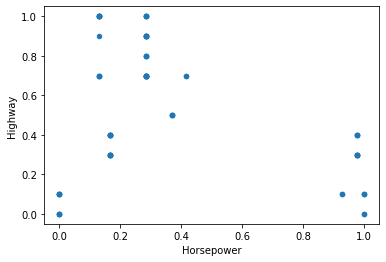

In [42]:
import seaborn as sb
enroll = scaled_df
enroll.columns = ['Horsepower', 'Highway']
#sb.pairplot(enroll)
#enroll.plot(x=0, y=1)
enroll.plot.scatter(x=0, y=1)
